### EDA (Exploratory Data Analyst)

In [1]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import nltk
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as stopword
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
## Import Dataset
df = pd.read_csv('train_preprocess.tsv.txt', names = ['Text','Sentiment'], sep = '\t')
df

,Text,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [5]:
df_cleaned = df.drop_duplicates()

In [6]:
df_cleaned

,Text,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [7]:
data_df = df_cleaned.copy()

In [8]:
data_df

,Text,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10933 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10933 non-null  object
 1   Sentiment  10933 non-null  object
dtypes: object(2)
memory usage: 256.2+ KB


In [10]:
data_df.describe()

,Text,Sentiment
count,10933,10933
unique,10933,3
top,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
freq,1,6383


In [11]:
data_df['Sentiment'].value_counts()

positive    6383
negative    3412
neutral     1138
Name: Sentiment, dtype: int64

In [12]:
data_df['Word Length'] = data_df['Text'].apply((lambda word: len(word.split())))

In [13]:
data_df.head(10)

,Text,Sentiment,Word Length
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
5,"makanan beragam , harga makanan di food stall ...",positive,28
6,pakai kartu kredit bca tidak untung malah rugi...,negative,9
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,42
8,saya bersama keluarga baru saja menikmati peng...,positive,68
9,bersyukur,positive,1


In [14]:
## Average Text Length

print("Average Text Length ==>", data_df['Word Length'].mean())
print("Median Text Length ==>", data_df['Word Length'].median())

Average Text Length ==> 33.060550626543495
Median Text Length ==> 28.0


Text(0.5, 0, 'Words')

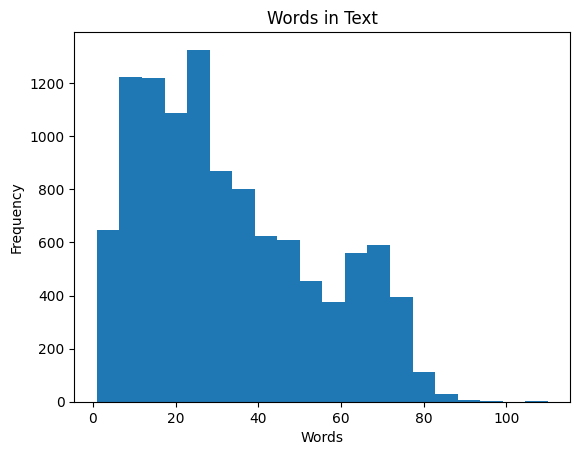

In [15]:
from matplotlib import pyplot as plt

data_df['Word Length'].plot(kind='hist', bins=20, title='Words in Text')
plt.xlabel('Words')

Text(0.5, 1.0, 'Sentiment')

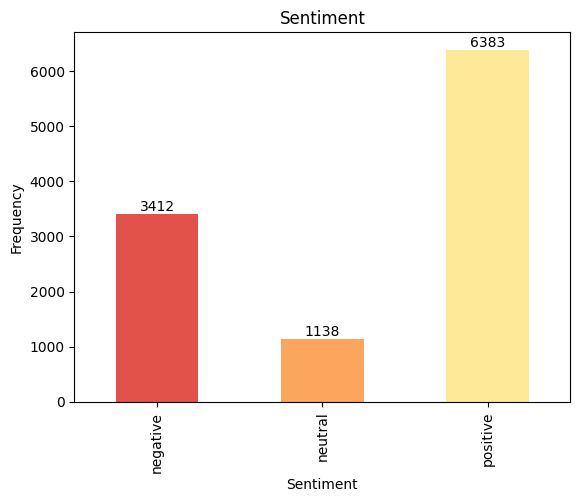

In [16]:
## Sentiment from data_train

ax = data_df.groupby('Sentiment').size().plot(kind='bar', color=sns.palettes.mpl_palette('Spectral'))
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylabel("Frequency")
plt.title("Sentiment")

In [17]:
## Dict for Kata Alay
kamusalay_df = pd.read_csv('new_kamusalay.csv', names = ['ALAY', 'TIDAK_ALAY'], encoding = 'latin1')
dict_alay = {
    'ALAY':[],
    'TIDAK_ALAY':[]
}
for i in kamusalay_df.itertuples():
  dict_alay['ALAY'].append(i.ALAY)
  dict_alay['TIDAK_ALAY'].append(i.TIDAK_ALAY)

In [18]:
## Text Cleansing menggunakan Regex

# menghapus USER,RT,URL
def remove_user_rt_url (str):
    string = re.sub(r'USER|\bRT\b|URL',' ',str)
    return string

# membuat lower case
def lower_case (str):
    string = str.lower()
    return string

# menghapus /n
def remove_n (str):
    string =  re.sub(r'\\n',' ',str)
    return string

# menghapus emoji
def remove_emo2 (str):
    pattern = re.compile(r'[\\x]+[a-z0-9]{2}')
    string = re.sub(pattern,'',str)
    return string

# menghapus link (http|https)
def remove_link (str):
    pattern = re.compile(r'www\S+|http\S+')
    string =  re.sub(pattern,' ',str)
    return string

# Hapus sisa karakter
# hapus special character dan pertahankan angka dan number
def remove_character(str):
    string = re.sub(r'[^a-zA-Z]+',' ',str)
    return string

#8 repalce alay
def replace_alay(str):
    for i in range(0,len(kamusalay_df)-1):
        alay = dict_alay['ALAY'][i]
        if (' ' + alay + ' ') in (' ' + str + ' '):
            replace = dict_alay['TIDAK_ALAY'][i]
            str = re.sub(r'\b{}\b'.format(alay),replace,str)
    return str

#9 remove extra space
def remove_extra_space (str):
    str = re.sub('  +', ' ', str)
    str = str.strip()
    return str

def regex_cleansing(str):
    str = remove_user_rt_url (str)
    str = lower_case (str)
    str = remove_n (str)
    str = remove_emo2 (str)
    str = remove_link (str)
    str = remove_character(str)
    str = remove_extra_space (str)
    str = replace_alay(str)
    str = remove_extra_space (str)
    return str


In [19]:
data_df['Text_Cleansing'] = data_df['Text'].apply(regex_cleansing)
data_df = data_df[['Text','Text_Cleansing','Sentiment']]

In [20]:
data_df.head(21)

,Text,Text_Cleansing,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k mmbri hujjah partai ap...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unbog paket d...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative
5,"makanan beragam , harga makanan di food stall ...",makanan beragam harga makanan di food stall ak...,positive
6,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit baca tidak untung malah rug...,negative
7,"tempat unik , bagus buat foto , makanan enak ,...",tempat unik bagus buat foto makanan enak pegaw...,positive
8,saya bersama keluarga baru saja menikmati peng...,saya bersama keluarga baru saja menikmati peng...,positive
9,bersyukur,bersyukur,positive


In [21]:
## Preprocessing Text

factory = StemmerFactory()
stemer = factory.create_stemmer()

list_stopwords_id = stopword.words('indonesian')
list_stopwords_en = stopword.words('english')

list_stopwords_id.extend(list_stopwords_en)
list_stopwords_id.extend(['ya', 'yg', 'ga', 'yuk', 'dah','nya','duh','sih'])

# not_stopwords = {'enggak', 'tidak'}
# list_stopwords_id = set([word for word in list_stopwords_id if word not in not_stopwords])

#1 Tokenisasi
def tokenize (text):
  token = word_tokenize(text)
  return token

#2 StopWord removal
def stop_words(text):
  after_stopwords = [word for word in text if not word in list_stopwords_id]
  return after_stopwords

#3 Stemming
def stemming (text):
  after_stemming = [stemer.stem(word) for word in text]
  return after_stemming

#4 Token to sentence
def sentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

def preprocesing(text):
  text = tokenize(text)
  text = stop_words(text)
  text = stemming(text)
  text = sentence(text)
  return text

In [22]:
data_df['Text_Preprocessing'] = data_df['Text_Cleansing'].apply(preprocesing)
data_df = data_df[['Text','Text_Cleansing','Text_Preprocessing','Sentiment']]

In [23]:
data_df.head()

,Text,Text_Cleansing,Text_Preprocessing,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus k mmbri hujjah partai diwlh ...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,lokasi strategis jalan sumatra bandung nyaman ...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unbog paket d...,betapa bahagia unbog paket barang bagus tetap ...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh mahasiswa sombong kasih kartu kuning ajar...,negative


In [26]:
def convert_text_to_word(data):
  list_words=''
  for text in data_negative:
      for word in text:
          list_words += ''+(word)
  return list_words

WORD CLOUD SENTIMENT

In [27]:
data_positive = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'positive']
data_negative = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'negative']
data_neutral = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'neutral']

In [29]:
list_word_positive = convert_text_to_word(data_positive)
list_word_negative = convert_text_to_word(data_negative)
list_word_neutral = convert_text_to_word(data_neutral)

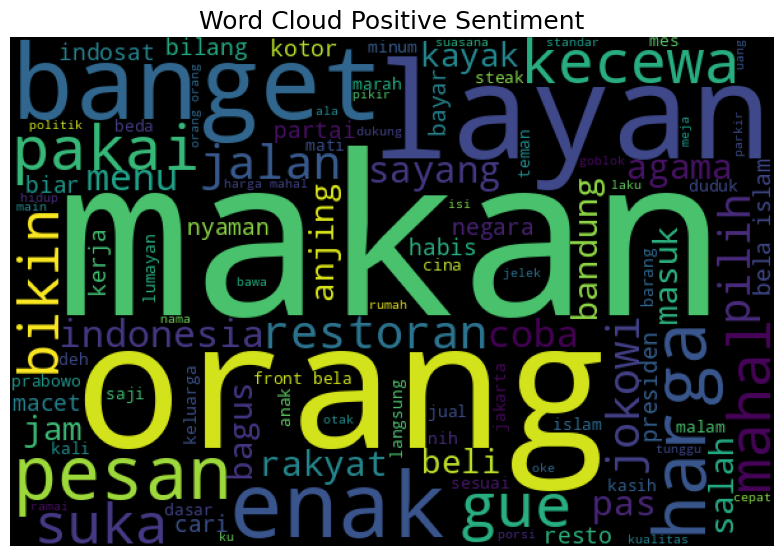

In [31]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_positive)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud Positive Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

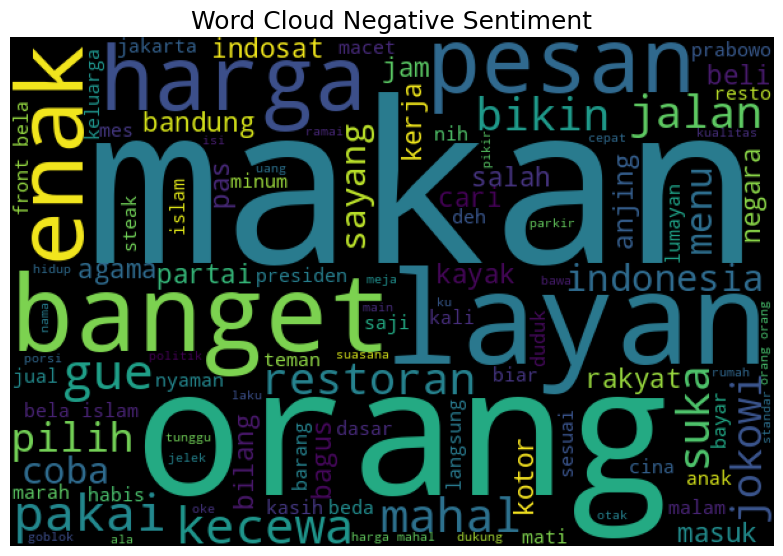

In [33]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_negative)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud Negative Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

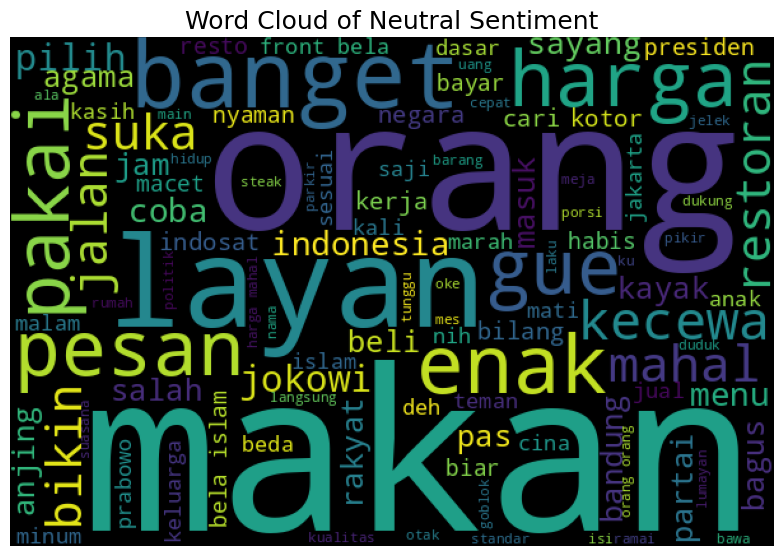

In [34]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_neutral)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Neutral Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()